<a href="https://colab.research.google.com/github/subashree962004/SCT_ML_3/blob/main/Task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c dogs-vs-cats

 99% 807M/812M [00:11<00:00, 70.7MB/s]
100% 812M/812M [00:11<00:00, 71.8MB/s]


In [ ]:
! unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [ ]:
train_path='/content/train.zip'

In [ ]:
test_path='/content/test1.zip'

In [ ]:
! unzip /content/train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
! unzip /content/test1.zip

Streaming output truncated to the last 5000 lines.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           

In [ ]:
import os
import cv2
import numpy as np
train_path='/content/train'
test_path='/content/test1'
img_size=32
def preprocess_image(img_path):
  img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
  if img is None:
    return None

  img=cv2.resize(img,(img_size,img_size))
  return img.flatten()

In [ ]:
train_data=[] # initialize as a list
train_labels=[] # initialize as a list
test_data = []  # Initialize test_data as a list
test_names = []
subset_size=1000

for i,img_name in enumerate (os.listdir(train_path)[:subset_size]):
  img_path=os.path.join(train_path,img_name)
  if os.path.isfile(img_path):
    img_data=preprocess_image(img_path)
    if img_data is not None:
      label=1 if 'dog' in img_name else 0
      train_data.append(img_data) # append to list
      train_labels.append(label) # append to list
train_data=np.array(train_data) # convert to ndarray after the loop
train_labels=np.array(train_labels) # convert to ndarray after the loop
for i, img_name in enumerate(os.listdir(test_path)[:subset_size]):
    img_path = os.path.join(test_path, img_name)
    if os.path.isfile(img_path):
        img_data = preprocess_image(img_path)
        if img_data is not None:
            test_data.append(img_data)
            test_names.append(img_name)

test_data = np.array(test_data).reshape(len(test_data),-1)
print("Test images loaded and preprocessed!")

Test images loaded and preprocessed!


In [ ]:
predicted_labels=model.predict(test_data)
label_map={1:'Dog',0:'Cat'}
predicted_labels_text=[label_map[label]for label in predicted_labels]

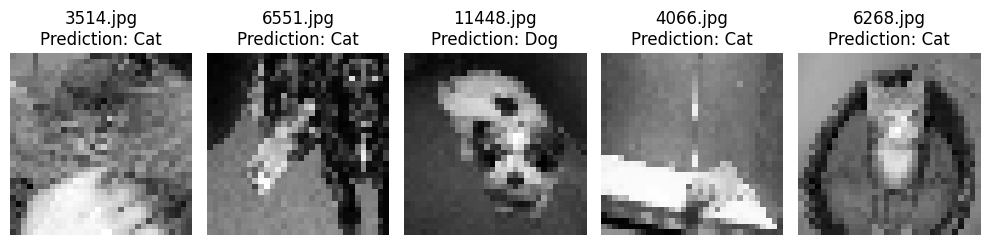

In [ ]:
import matplotlib.pyplot as plt

def display_images_with_predictions(images, predictions, filenames, num_images=5):
    plt.figure(figsize=(10, 10))

    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(32, 32), cmap='gray') # Reshape the image data to 32x32
        plt.title(f'{filenames[i]}\nPrediction: {predictions[i]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

display_images_with_predictions(test_data, predicted_labels_text, test_names, num_images=5)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train,x_val,y_train,y_val=train_test_split(train_data,train_labels,test_size=0.2,random_state=42)
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_val_pred=model.predict(x_val)
accuracy=accuracy_score(y_val,y_val_pred)
print(f'Validation Accuracy:{accuracy*100:.2f}%')

Validation Accuracy:51.00%


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',gamma='scale')
svm.fit(x_train,y_train)
y_val_pred=svm.predict(x_val)
accuracy=accuracy_score(y_val,y_val_pred)
print(f'Vlidation Accuracy:{accuracy*100:.2f}%')

Vlidation Accuracy:57.00%


In [ ]:
test_predictions=svm.predict(test_data)
predicted_labels=['dog' if label==1 else 'cat'for label in test_predictions]
for name,pred in zip(test_names[:5],predicted_labels[:5]):
  print(f'{name}:{pred}')

3514.jpg:cat
6551.jpg:cat
11448.jpg:dog
4066.jpg:cat
6268.jpg:dog


In [ ]:
import pandas as pd
submission=pd.DataFrame({'id':[int(name.split('.')[0])for name in test_names],'label':[1 if label=='dog' else 0 for label in predicted_labels]})
submission.to_csv('submission.csv',index=False)
print("Submission file created!")

Submission file created!


In [ ]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>